## Laboratorio No 3
### 07140147 José Hernández
### 21001119 Velvet Gonzalez

In [1]:
import pandas as pd
import spacy
import spacy.cli
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
spacy.cli.download("en_core_web_md")
nlp = spacy.load('en_core_web_md')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [3]:
col_names = ('Numero', 'ID','Fecha','Tipo','Usuario','Tweet')

In [4]:
data = pd.read_csv('data.csv', names=col_names , encoding='latin-1')
data.head()

,Numero,ID,Fecha,Tipo,Usuario,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
data.isnull().sum()

Numero     0
ID         0
Fecha      0
Tipo       0
Usuario    0
Tweet      0
dtype: int64

In [6]:
def get_user(tuit):
    regex = r"@[a-zA-Z0-9]+\s"
    try:
        match = re.search(regex, tuit)
        match = match[0].replace(' ','')
    except:
        pass
    return match

In [7]:
users = data['Tweet'].apply(get_user).dropna()

In [8]:
users.value_counts()

@mileycyrus       4142
@tommcfly         3736
@ddlovato         3166
@Jonasbrothers    1209
@DavidArchie      1194
                  ... 
@RubyBlue29          1
@alexcousins         1
@customink           1
@shortMonica         1
@ahmedworld          1
Name: Tweet, Length: 300820, dtype: int64

In [9]:
data = data[['ID', 'Fecha', 'Usuario', 'Tweet']]

In [10]:
def select_user(df,col,user):
    usr = df[df[col].str.lower().str.contains(user)]
    usr['Size']=[len(i) for i in usr[col]]
    return usr

In [11]:
MileyCirus = select_user(data, 'Tweet', '@mileycyrus')
TomMcFly = select_user(data, 'Tweet', '@tommcfly')
DLovato = select_user(data, 'Tweet', '@ddlovato')

<ipython-input-10-2818a3e28387>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usr['Size']=[len(i) for i in usr[col]]


In [12]:
MileyCirus.head(3)

,ID,Fecha,Usuario,Tweet,Size
1021,1468063101,Mon Apr 06 23:30:57 PDT 2009,kristenn_lynn,@mileycyrus hahaha dont be like that one time ...,107
2014,1468286517,Tue Apr 07 00:45:20 PDT 2009,nathiuria,"@mileycyrus i have the same problem, but it's ...",137
2073,1468297110,Tue Apr 07 00:49:07 PDT 2009,amyamoore,@mileycyrus I guess counting sheep didn't work...,72


In [13]:
TomMcFly.head(3)

,ID,Fecha,Usuario,Tweet,Size
1690,1468210813,Tue Apr 07 00:19:09 PDT 2009,mcsteph94,@tommcfly hey saw u guys play @ pushover..didn...,138
1789,1468233211,Tue Apr 07 00:26:52 PDT 2009,mcflyholland,@tommcfly Good morning Tom! Why can't I send y...,131
2514,1468391638,Tue Apr 07 01:23:07 PDT 2009,ckstarlet,@tommcfly did you know that johnsons baby use ...,96


In [14]:
DLovato.head(3)

,ID,Fecha,Usuario,Tweet,Size
460,1467929230,Mon Apr 06 22:51:34 PDT 2009,toritor11,@ddlovato @David_Henrie ummmmm i cant find it.,47
573,1467953367,Mon Apr 06 22:58:30 PDT 2009,lovatolover,@ddlovato Do you hate us?? Please don't,40
7032,1469661950,Tue Apr 07 07:02:58 PDT 2009,mariapersson,@ddlovato Wish that i could see it.. Thats th...,96


# Parte 2

In [15]:
def Normalizacion (corpus):
  newCorpus = []
  for doc in corpus:
    newCorpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]','',doc).lower().strip().rstrip('\n').rstrip('\r\n'))
  return newCorpus

In [16]:
def tokenizacion(corpus):
  newCorpus = []
  for doc in corpus:
    newCorpus.append(nlp(doc))
  return newCorpus

In [17]:
def removeStops(corpus):
  newCorpus=[]
  for doc in corpus:
    s= ''
    for token in doc:
      if(token.is_stop == False):
        s = s+token.text+' '
    newCorpus.append(s.strip())
  return newCorpus

In [18]:
def streamingLemmating(corpus):
  documents = tokenizacion(corpus)
  newCorpus = []
  for doc in documents:
    s = ''
    for token in doc:
      s = s+ token.lemma_ +' '
    newCorpus.append(s.strip())
  return newCorpus

In [19]:
def corpus_completo(df, tuit):
    corpus1 = Normalizacion(df['Tweet'])
    corpus2 = tokenizacion(corpus1)
    corpus3 = removeStops(corpus2)
    corpus4 = streamingLemmating(corpus3)
    return corpus4
    
    
    

In [20]:
corpusMiley = corpus_completo(MileyCirus, 'Tweet')
corpusTomMcFly = corpus_completo(TomMcFly, 'Tweet')
corpusDLovato = corpus_completo(DLovato, 'Tweet')

In [21]:
corpusMiley

['mileycyrus hahaha not like time ny get 30 min sleep get sick    love',
 'mileycyrus problem 443 let count works123456 57 58 132 133 134 zs',
 'mileycyrus guess count sheep not work    hope sleep',
 'mileycyrus mean spending day heaven wmy mom get',
 'mileycyrus awww u seriously cut dog miley sorry    hope u sleep xoxo',
 'mileycyrus httptwitpiccom2xszg    nap point need gma go to come early',
 'mileycyrus find quote not answer well sleep xoxo germany morning',
 'mileycyrus httptwitpiccom2y606    want sofie    s helllza cute',
 'mileycyrus ouch',
 'mileycyrus dude 4 mile run cold ass boston wake suck',
 'mileycyrus aww feel u u wake school    hopefully ill meet u today hah lt3',
 'mileycyrus awe feel u wake school    hopefully well rest day amp hope include meet u lol',
 'mileycyrus wow early start not bed hope tummy feel well soon    love aussie fan    xxx',
 'mileycyrus come reply',
 'mileycyrus aww    chin hun',
 'mileycyrus god blizzard',
 'mileycyrus good luck wish thereee',
 'mi

In [22]:
corpusTomMcFly

['tommcfly hey see u guy play    pushoverdidnt 2 meet u tho cuz th huge line    upset    lola msg 4',
 'tommcfly good morning tom not send message short question    bad guess',
 'tommcfly know johnson baby use animal like cute bunny test product',
 'dougiemcfly tommcfly good morning guy know frustrating reply',
 'tommcfly hey chance add brighton eastbourne ucap tour gutte m miss time round    love guy',
 'tommcfly fun tom need buy eclipse money sad timess',
 'tommcfly come play plymouth year cus not ucap tour cus not come near    oxo',
 'tommcfly o starbucks tehe oooh want',
 'tommcfly aw want starbuck',
 'tommcfly read eclipse not watch twilight movie want like book movie bad',
 'tommcfly httptwitpiccom3iquy    miss old hairstyle daniel    look great',
 'tommcfly hope love amsterdam enjoy sunbathe lol cloudy america',
 'tommcfly wish d guy',
 'tommcfly awww    come go star trek premier xx',
 'tommcfly feel sad not travel guy amsterdam    come norway soon',
 'tommcfly awww ve try    pl

In [23]:
corpusDLovato

['ddlovato davidhenrie ummmmm not find',
 'ddlovato hate not',
 'ddlovato wish    s downside live sweden good luck',
 'ddlovato hey demi wen selena go to video miss',
 'ddlovato ahhhh wish dallas showbut will not near',
 'ddlovato see tour date sadyou come houston days home vacation',
 'ddlovato sonny chance uk 6 day not wait ill miss m mcfly concert    hmm    ill record',
 'ddlovato demii stage go not know kind seat look buy tuesdayy',
 'ddlovato hi demi airport germany munich miss like day    d answer ll grea',
 'ddlovato awww omg wana c ure new',
 'ddlovato hey demi come austria',
 'ddlovato whyy fault parent busy 1th time    feel upset    u',
 'ddlovato hihow long london uni lecture wednesday',
 'ddlovato u know message',
 'ddlovato miss toooooooo    xoxo',
 'ddlovato hey demi come austria    yeah wish good flight',
 'ddlovato hey demi come austria    yeah wish good flight',
 'ddlovato ilove ou demi great',
 'ddlovato wish reply mee',
 'ddlovato wish come toronto',
 'ddlovato wish 

# parte 3

In [24]:
def listToString(s):
  strX=''
  for palabra in s:
    strX = strX + palabra + ' '
  return strX

In [25]:
cloudMiley  = listToString(corpusMiley)
cloudMiley = re.sub("@mileycyrus|mileycyrus|miley|cyrus","",cloudMiley)

In [26]:
cloudTomMcFly  = listToString(corpusTomMcFly)
cloudTomMcFly = re.sub("@tommcfly|tommcfly|tomm|mcfly|tom|mcfly","",cloudTomMcFly)

In [27]:
cloudDLovato  = listToString(corpusDLovato)
cloudDLovato = re.sub("@ddlovato|ddlovato|lovato|demi","",cloudDLovato)

In [28]:
wordCloudMiley = WordCloud().generate(cloudMiley)
wordCloudTom = WordCloud().generate(cloudTomMcFly)
wordCloudDLovato = WordCloud().generate(cloudDLovato)

# Cloud  Miley Cyrus

####  Razón de mención: fans citandola para demostrar aprecio por ella y sus canciones, burlas a Hanna Montana y solicitando votos por participación en algún show de talentos

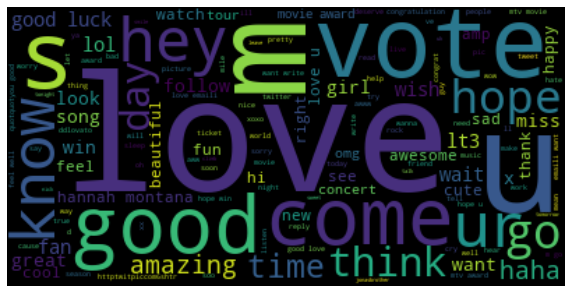

In [29]:
plt.figure(figsize=(10, 8)) 
plt.imshow(wordCloudMiley,  interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show() 

# Cloud Tom McFly
### Razón de mención: fans de su música hablando o solicitando tours, probablemente en Brasil.

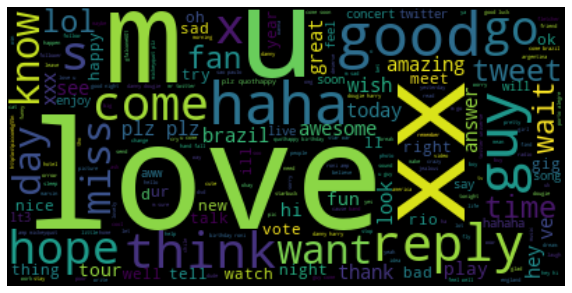

In [30]:
plt.figure(figsize=(10, 8)) 
plt.imshow(wordCloudTom,  interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show() 

# Cloud Demi Lovato
### Razón de mención: fans expresando aprecio hacia Demy Lovato, esperanado un concierto y votos para participación en the voice

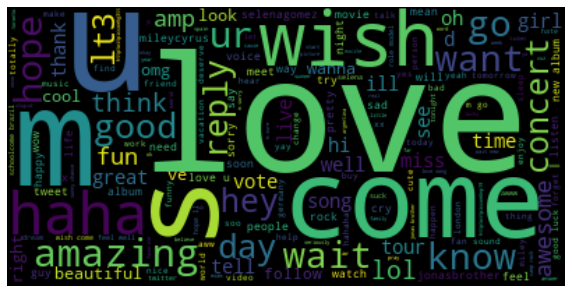

In [31]:
plt.figure(figsize=(10, 8)) 
plt.imshow(wordCloudDLovato,  interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show() 